In [1]:
from Flower import *

#from py21cmsense import GaussianBeam, Observation, Observatory, PowerSpectrum, hera|
from astropy import units as un
from alive_progress import alive_bar
from time import time
from Leaf import *
import h5py

NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
low = (lambda x: [.7*x])
high = (lambda x: [1.3*x])
default = [0.05012, 0.1, 5.012e8, .5]
main = [True, True, 40, 500, 5, 30]

parameters = np.asarray([
    main + default,
    main + low(default[0]) + default[1:],
    main + high(default[0]) + default[1:],
    
    main + [default[0]] + low(default[1]) + default[2:],
    main + [default[0]] + high(default[1]) + default[2:],
    
    main + default[:2] + low(default[2]) + [default[3]],
    main + default[:2] + high(default[2]) + [default[3]],
    
    main + default[:3] + low(default[3]),
    main + default[:3] + high(default[3])
])
print(parameters[:,-4:])

[[5.0120e-02 1.0000e-01 5.0120e+08 5.0000e-01]
 [3.5084e-02 1.0000e-01 5.0120e+08 5.0000e-01]
 [6.5156e-02 1.0000e-01 5.0120e+08 5.0000e-01]
 [5.0120e-02 7.0000e-02 5.0120e+08 5.0000e-01]
 [5.0120e-02 1.3000e-01 5.0120e+08 5.0000e-01]
 [5.0120e-02 1.0000e-01 3.5084e+08 5.0000e-01]
 [5.0120e-02 1.0000e-01 6.5156e+08 5.0000e-01]
 [5.0120e-02 1.0000e-01 5.0120e+08 3.5000e-01]
 [5.0120e-02 1.0000e-01 5.0120e+08 6.5000e-01]]


In [2]:
low = (lambda x: [.7*x])
high = (lambda x: [1.3*x])
default = [0.05012, 0.1, np.log10(5.012e8), .5]
main = [True, True, 40, 500, 5, 30]

parameters = [
    main + default,
    main + low(default[0]) + default[1:],
    main + high(default[0]) + default[1:],
    
    main + [default[0]] + low(default[1]) + default[2:],
    main + [default[0]] + high(default[1]) + default[2:],
    
    main + default[:2] + low(default[2]) + [default[3]],
    main + default[:2] + high(default[2]) + [default[3]],
    
    main + default[:3] + low(default[3]),
    main + default[:3] + high(default[3])
]

print(parameters)

with alive_bar(len(parameters), force_tty=True) as bar:
    for i, params in enumerate(parameters):
        tstart = time()
        # 0 inh,ts = off,off :    ~ 5.5 min
        # 1 inh,ts = on,off :     ~ 4.1 min
        # 2 inh,ts = off,on :     ~ 6 min
        # 3 inh,ts = on,on :      ~ 6.2 min

        # To set the parameter ranges, the parameter must be given as a dict, following the dict
        # structure defined in parameter.yaml. The values must be an array which is handed over
        # to the samplef defined above. In this case it is [start, stop].
        user_parameter = {
            "HII_DIM": 140,
            "BOX_LEN": 200,
            "N_THREADS": 12,
            "USE_INTERPOLATION_TABLES": True,
            "PERTURB_ON_HIGH_RES": False,
            "USE_FFTW_WISDOM": True,
        }
        flag_options = {
            "INHOMO_RECO": params[0],
            "USE_TS_FLUCT": params[1],
            "USE_MASS_DEPENDENT_ZETA": True,
        }

        astro_params = {
            "INHOMO_RECO": params[0],
            "L_X": params[2],
            "NU_X_THRESH": params[3],
            "ION_Tvir_MIN": params[4],
            "HII_EFF_FACTOR": params[5],
            "F_STAR10": params[6],
            "F_ESC10": params[7],
            "M_TURN": params[8],
            "t_STAR": params[9]
        }

        redshift = 5.5

        # Initialize the wrapper with the above given parameters,
        # for more details check the docs or the tutorial.ipynb.
        sim = Leaf(user_params=user_parameter, flag_options=flag_options, astro_params=astro_params, debug=True, redshift=redshift)

        sim.run_lightcone(redshift = redshift,
                        save = True,
                        random_seed = 42069,
                        sanity_check= False,
                        filter_peculiar= False,
                        user_params = user_parameter,
                        flag_options = flag_options,
                        run_id = i)
        tend = time()
        print(tend-tstart)
        bar()

[[True, True, 40, 500, 5, 30, 0.05012, 0.1, 8.700011062322112, 0.5], [True, True, 40, 500, 5, 30, 0.035084, 0.1, 8.700011062322112, 0.5], [True, True, 40, 500, 5, 30, 0.065156, 0.1, 8.700011062322112, 0.5], [True, True, 40, 500, 5, 30, 0.05012, 0.06999999999999999, 8.700011062322112, 0.5], [True, True, 40, 500, 5, 30, 0.05012, 0.13, 8.700011062322112, 0.5], [True, True, 40, 500, 5, 30, 0.05012, 0.1, 6.090007743625478, 0.5], [True, True, 40, 500, 5, 30, 0.05012, 0.1, 11.310014381018746, 0.5], [True, True, 40, 500, 5, 30, 0.05012, 0.1, 8.700011062322112, 0.35], [True, True, 40, 500, 5, 30, 0.05012, 0.1, 8.700011062322112, 0.65]]
on 0: Set initial parameters...                                                 
on 0: Begin lightcone simulation ...                                            
on 0: Parameter successfully refreshed.                                         
on 0: Current parameters are:                                                   
      astro_params: AstroParams:
        

KeyboardInterrupt: 

In [13]:
from py21cmfast_tools import calculate_ps
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  # To control colorbar placement

run_name = [
    "0|0|0|0",
    "+|0|0|0",
    "-|0|0|0",
    "0|+|0|0",
    "0|-|0|0",
    "0|0|+|0",
    "0|0|-|0",
    "0|0|0|+",
    "0|0|0|-"
]
bins = 10
zslices = 6

for i, name in enumerate(run_name):
    with h5py.File(f'/home/allomere/Documents/projects/master/data/lightcone_np/simrun_{i}.h5', 'r+') as h5file:
        dataset = h5file['global_quantities']

    lc = p21c.outputs.LightCone.read(f'/home/allomere/Documents/projects/master/data/lightcone_np/simrun_{i}.h5')
    try:
        fig, _ = p21c.plotting.lightcone_sliceplot(lc)
        fig.tight_layout()
        fig.savefig(f'./lc_{name}.png', dpi=350)
        fig.clf()
    except:
        print("blub :3")

    fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
    ax = ax.flatten()
    fig.suptitle(f'inh,ts: {name}', fontsize=16)

    res = calculate_ps(lc=lc.lightcones['brightness_temp'], lc_redshifts=lc.lightcone_redshifts, 
                       box_length=lc.user_params.BOX_LEN, box_side_shape=lc.user_params.HII_DIM,
                       log_bins=False, zs=np.linspace(7, 24, zslices), calc_1d=True, calc_2d=True, 
                       kpar_bins=bins, nbins=bins, nbins_1d=bins, bin_ave=True, 
                       k_weights=ignore_zero_absk, postprocess=True)

    ps_1d, ps_2d = res['ps_1D']+1, res['final_ps_2D']+1

    ps_2d = np.transpose(ps_2d, axes=(0,2,1))[:,::-1,:]
    bins_1d, bins_par, bins_perp = res['k'], res['final_kpar'], res['final_kperp']

    # Find the global minimum and maximum values for log scaling across all slices
    ps_min = np.min([np.min(np.log10(ps_1d)), np.min(np.log10(ps_2d))])
    ps_max = np.max([np.max(np.log10(ps_1d)), np.max(np.log10(ps_2d))])

    for j in range(zslices):
        # Define the bin edges for the 2D pcolormesh plot (based on bins_perp and bins_par)
        x_edges = np.concatenate([bins_perp, [2 * bins_perp[-1] - bins_perp[-2]]])
        y_edges = np.concatenate([bins_par, [2 * bins_par[-1] - bins_par[-2]]])

        # Plot the 2D power spectrum with pcolormesh using the bin edges
        div = make_axes_locatable(ax[j])
        cbax = div.append_axes("right", size="5%", pad=0.05)  # Create an axis for the colorbar
        cb = ax[j].pcolormesh(x_edges, y_edges, np.log10(ps_2d[j]), shading='auto', vmin=ps_min, vmax=ps_max)
        cbar = plt.colorbar(cb, cax=cbax)
        cbar.set_label(r'Log $P(k) +1$ [mK]')
        
        # Create a twin axis for the 1D power spectrum
        ax_twin = ax[j].twinx()
        ax_twin.plot(bins_1d, np.log10(ps_1d[j]), color='r')

        # Set the tick ranges for both ps_1D and ps_2D to be consistent
        ax_twin.set_ylim(ps_min, ps_max)
        # Set labels and scales
        ax[j].set_xlabel(r'$k_\perp$')
        ax[j].set_ylabel(r'$k_\parallel$')
        ax_twin.set_ylabel(r'Log $P(k)+1$ [mK]', color='r')
        ax[j].set_title(rf'$z = $ {np.round(np.linspace(7, 24, zslices)[j], 2)}')

        # Sync the x-axis limits of both axes
        ax[j].set_xlim(bins_1d.min(), bins_1d.max())
        ax_twin.set_xlim(bins_1d.min(), bins_1d.max())

    # Adjust layout to avoid overlap between subplots
    plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, wspace=0.3, hspace=0.3)

    fig.tight_layout()
    fig.savefig(f'./ps_{run_name[i]}.png', dpi=500)


/home/allomere/Documents/projects/master/ml-venv/lib/python3.12/site-packages/py21cmfast/_utils.py:412: UserWarning: The following parameters to UserParams are not supported: ['AVG_BELOW_SAMPLER', 'HALOMASS_CORRECTION', 'INTEGRATION_METHOD_ATOMIC', 'INTEGRATION_METHOD_MINI', 'MAXHALO_FACTOR', 'MIN_LOGPROB', 'N_COND_INTERP', 'N_PROB_INTERP', 'PARKINSON_G0', 'PARKINSON_y1', 'PARKINSON_y2', 'SAMPLER_BUFFER_FACTOR', 'SAMPLER_MIN_MASS', 'SAMPLE_METHOD']
  warnings.warn(
/home/allomere/Documents/projects/master/ml-venv/lib/python3.12/site-packages/py21cmfast/_utils.py:412: UserWarning: The following parameters to FlagOptions are not supported: ['CELL_RECOMB', 'FIXED_HALO_GRIDS', 'HALO_STOCHASTICITY', 'PHOTON_CONS_TYPE', 'USE_EXP_FILTER', 'USE_UPPER_STELLAR_TURNOVER']
  warnings.warn(
/home/allomere/Documents/projects/master/ml-venv/lib/python3.12/site-packages/py21cmfast/_utils.py:412: UserWarning: The following parameters to AstroParams are not supported: ['CORR_LX', 'CORR_SFR', 'CORR_STAR'

ValueError: PhotonConsSmoothing is not a valid parameter of global_params

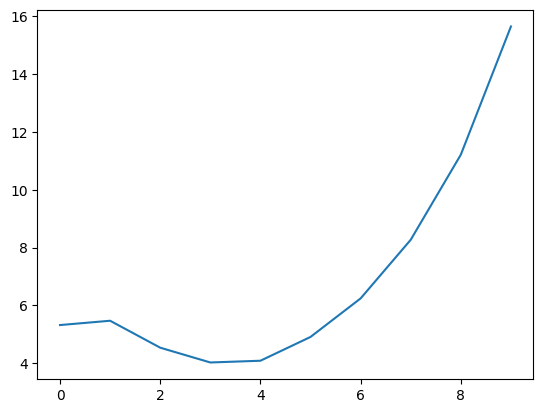

In [6]:
plt.plot(res['ps_1D'][4])

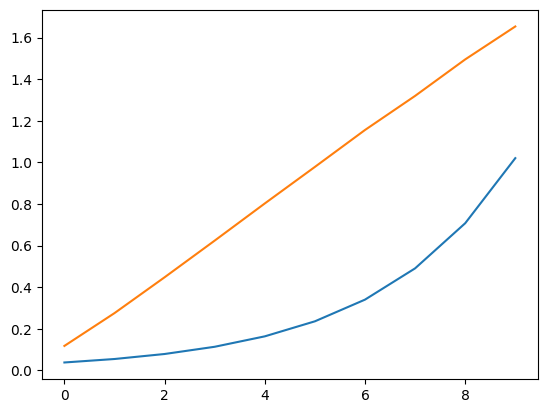

In [3]:
plt.plot(bins_par)
plt.plot(bins_perp)

In [10]:
print(bins_par)

[0.03773142 0.05442639 0.07850838 0.1132459  0.16335369 0.23563262
 0.33989272 0.49028469 0.70722041 1.02014346]


In [ ]:
lc = p21c.outputs.LightCone.read('/home/allomere/Documents/projects/master/data_emcee_1d/fiducial_cone.h5')
_,_ = p21c.plotting.lightcone_sliceplot(lc)
from powerbox import get_power

ps3 = calculate_ps(lc = lc.lightcones['brightness_temp'] , 
                           lc_redshifts=lc.lightcone_redshifts, 
                           box_length=lc.user_params.BOX_LEN, 
                           box_side_shape=lc.user_params.HII_DIM,
                           log_bins=False, zs = np.linspace(5.5, 25, 10), 
                           calc_1d=True, calc_2d=False,
                           nbins_1d=np.linspace(0.1,1,10), bin_ave=True, 
                           k_weights=ignore_zero_absk,postprocess=True, chunk_size=40,
                           get_vat)
print(ps3['k'].size)


In [ ]:
print(ps.shape)
plt.clf()
plt.plot(np.log10(ps3['k']), np.log10(ps).T, label=np.linspace(5.5, 25, 10, dtype=int))
plt.legend()
plt.show()
plt.plot(np.log10(k2).T, np.log10(ps2*k2**2).T,label=np.linspace(5.5, 25, 10, dtype=int))
plt.legend()
plt.show()
plt.plot(np.log10(ps3['k']), np.log10(ps3['ps_1D']).T,label=np.linspace(5.5, 25, 10, dtype=int)) 
plt.legend()
plt.show()

In [ ]:
ps.shape

In [ ]:
sensitivity = PowerSpectrum(
    observation=Observation(
        observatory=Observatory(
            antpos=hera(hex_num=7, separation=14 * un.m),
            beam=GaussianBeam(frequency=135.0 * un.MHz, dish_size=14 * un.m),
            latitude=38 * un.deg,
        )
    )
)

observatory = sensitivity.observation.observatory

plt.figure(figsize=(5, 4.5))
plt.scatter(observatory.baselines_metres[:, :, 0], observatory.baselines_metres[:, :, 1], alpha=0.1)
plt.xlabel("Baseline Length [x, m]")
plt.ylabel("Baseline Length [y, m]")
plt.show()

kperp = un.Quantity(np.linspace(0.01, 0.07, 15), "littleh/Mpc")
kpar = un.Quantity(np.linspace(0.1, 2, 15), "littleh/Mpc")
sense_gridded = sensitivity.calculate_sensitivity_2d_grid(kperp_edges=kperp, kpar_edges=kpar)
plt.imshow(np.log10(sense_gridded.value.T), origin="lower")
plt.colorbar()

In [ ]:
# initialize probability class

prior_ranges = {
    "astro_params": {
        "L_X": [38, 42],
        "NU_X_THRESH": [100, 1500],
        "ION_Tvir_MIN": [4, 5.3],
        "HII_EFF_FACTOR": [10, 250]
    }
}

fiducial_parameter = {
    "user_params": {
        "HII_DIM": 80,
        "BOX_LEN": 200,
        "N_THREADS": 1,
        "USE_INTERPOLATION_TABLES": True,
    },
    "flag_options": {
        "USE_TS_FLUCT": False,
        "INHOMO_RECO": False
    },
    "astro_params": {
        "INHOMO_RECO": False,
        "L_X": 40,
        "NU_X_THRESH": 500,
        "ION_Tvir_MIN": 5,
        "HII_EFF_FACTOR": 30
    },
    "make_statistics": False,
}

probability = Probability(prior_ranges=prior_ranges, z_eval=np.linspace(5.5,30, 15), bins=15, debug=True, 
                          fmodel_path="./emcee_data/fiducial_ps.npy", summary_statistics = '1dps')

emcee = Flower(Probability=probability, redshift=5, data_path="./emcee_data/", noise_type=[1,0,5],
                       regenerate_fiducial=True, fid_params=fiducial_parameter, debug=True)

emcee.make_fiducial()


emcee.run_emcee(threads=6, nsteps=240, walkers=24)


dict_keys(['brightness_temp', 'density', 'xH_box'])


/home/allomere/Documents/projects/master/ml-venv/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


(15, 10, 10)


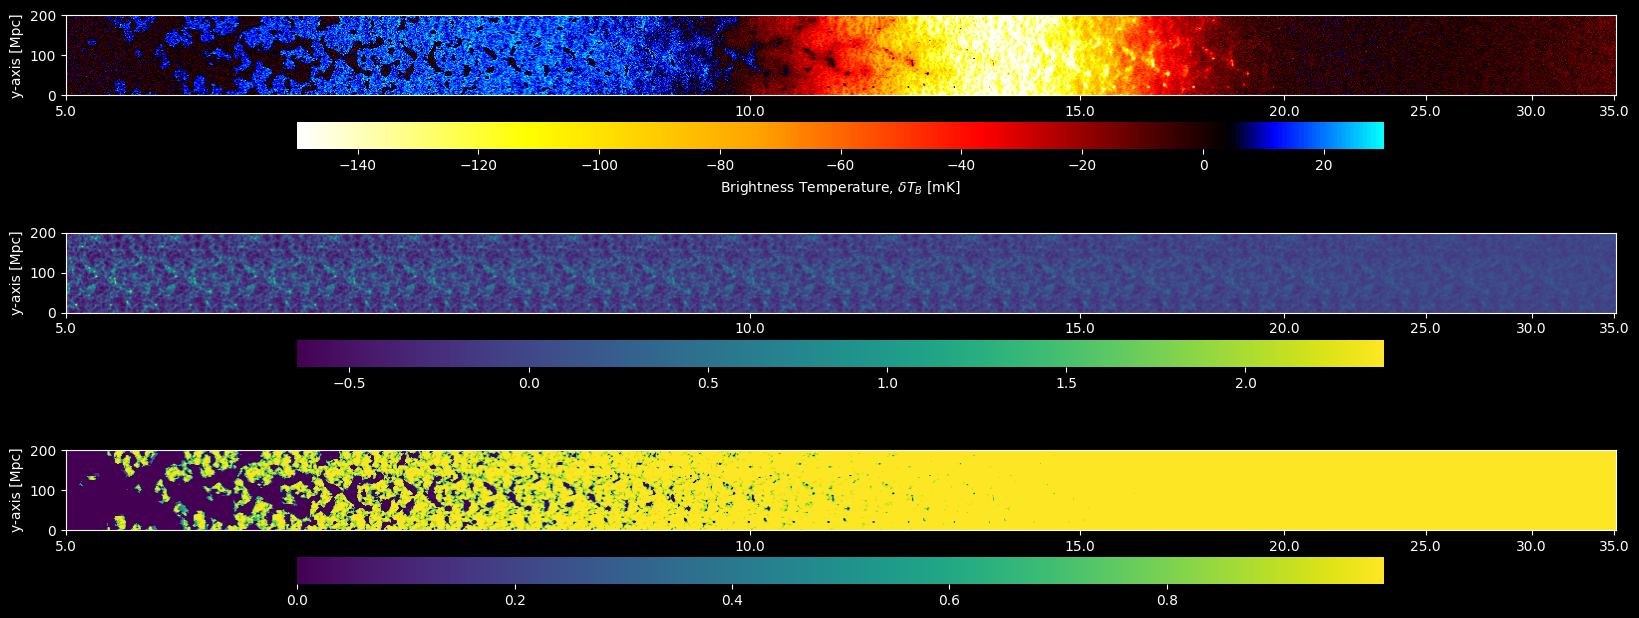

In [16]:

lc = p21c.outputs.LightCone.read("/home/allomere/Documents/projects/master/data/data_emcee_1d_noise2/fiducial_cone.h5")
lcb = lc.brightness_temp
print(lc.lightcones.keys())

fig, ax = plt.subplots(3,1, figsize=(20,8))

for i, field in enumerate(list(lc.lightcones.keys())):

    fig, ax[i] = p21c.plotting.lightcone_sliceplot(lc, fig=fig, ax=ax[i], kind=field)

fig.savefig("lightcone.png")

res = calculate_ps(lc = lc.lightcones['brightness_temp'] , lc_redshifts=lc.lightcone_redshifts, 
                           box_length=lc.user_params.BOX_LEN, box_side_shape=lc.user_params.HII_DIM,
                           log_bins=False, zs = np.linspace(5.5,30, 15), calc_1d=True, calc_2d=True, get_variance=True,
                           nbins=10, kpar_bins=10, bin_ave=True, k_weights=ignore_zero_absk, postprocess=True)
print(res['final_var_2D'].shape)

In [17]:
print(res['full_var_2D'].shape)
print(res['final_var_2D'].shape)

(15, 10, 80)
(15, 10, 10)


(15, 15, 80)


In [ ]:
perp_bins, par_bins = 10,10

res = calculate_ps(lc = lc.lightcones['brightness_temp'] , lc_redshifts=lc.lightcone_redshifts, 
                           box_length=lc.user_params.BOX_LEN, box_side_shape=lc.user_params.HII_DIM,
                           log_bins=False, zs = np.linspace(5.5,30, 10), calc_1d=True, calc_2d=True, nbins=perp_bins, kpar_bins=par_bins,
                            bin_ave=True, k_weights=ignore_zero_absk, nbins_1d=15, get_variance=True, postprocess=False)
# plot 1d ps 

print(res.keys())

k = res['k']

plt.title("1D PS")
plt.xlabel(r'$\log_{10} k [h/$Mpc$]$')
plt.ylabel(r'$\log_{10} P(k)$ $[mK^2]$')
plt.plot(np.log10(k), np.log10(res['ps_1D']).T, label=np.round(np.linspace(5.5,30, 10),1))
plt.legend()
plt.tight_layout()
#plt.savefig("1d_ps.png", dpi=400)
plt.show()
plt.clf()

plt.title("Variance 1D PS")
plt.plot(np.log10(k), np.log10(res['var_1D']).T, label=np.round(np.linspace(5.5,30, 10),1))
plt.plot(np.log10(k), np.log10(res['ps_1D']**2/160**2).T, label=np.round(np.linspace(5.5,30, 10),1), ls = 'dotted')
plt.xlabel(r'$\log_{10} k [h/$Mpc$]$')
plt.ylabel(r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
plt.legend()
plt.tight_layout()
plt.savefig("var_1d_ps_comp.png", dpi=400)
plt.show()
plt.clf()

for zi,z in enumerate(np.round(np.linspace(5.5,30, 10),1)):
    plt.scatter(np.log10(res['ps_1D'])[zi], np.log10(res['var_1D'])[zi], label=str(z), alpha=0.8)
plt.title("Power vs Variance 1D PS")
plt.xlabel(r'$\log_{10} P(k)$ $[mK^2]$')
plt.ylabel(r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
plt.legend()
plt.tight_layout()
#plt.savefig("power_vs_variance_1d_ps.png", dpi=400)
plt.show()
plt.clf()

In [ ]:
perp_bins, par_bins = 10,10

res = calculate_ps(lc = lc.lightcones['brightness_temp'] , lc_redshifts=lc.lightcone_redshifts, 
                           box_length=lc.user_params.BOX_LEN, box_side_shape=lc.user_params.HII_DIM,
                           log_bins=False, zs = np.linspace(5.5,30, 10), calc_1d=True, calc_2d=True, nbins=15, kpar_bins=15,
                            bin_ave=True, k_weights=ignore_zero_absk, nbins_1d=15, get_variance=True, postprocess=False)
# plot 1d ps 

print(res.keys())

k = res['k']

plt.title("1D PS")
plt.ylabel(r'$\log_{10} P(k)$ $[mK^2]$')
plt.plot(np.log10(k), np.log10(res['ps_1D']).T, label=np.round(np.linspace(5.5,30, 10),1))
plt.legend()
plt.tight_layout()
plt.savefig("1d_ps.png", dpi=400)
plt.show()
plt.clf()

plt.title("Variance 1D PS")
plt.plot(np.log10(k), np.log10(res['var_1D']).T, label=np.round(np.linspace(5.5,30, 10),1))
plt.xlabel(r'$\log_{10} k [h/$Mpc$]$')
plt.ylabel(r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
plt.legend()
plt.tight_layout()
plt.savefig("var_1d_ps.png", dpi=400)
plt.show()
plt.clf()

for zi,z in enumerate(np.round(np.linspace(5.5,30, 10),1)):
    plt.scatter(np.log10(res['ps_1D'])[zi], np.log10(res['var_1D'])[zi], label=str(z), alpha=0.8)
plt.title("Power vs Variance 1D PS")
plt.xlabel(r'$\log_{10} P(k)$ $[mK^2]$')
plt.ylabel(r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
plt.legend()
plt.tight_layout()
plt.savefig("power_vs_variance_1d_ps.png", dpi=400)
plt.show()
plt.clf()

# plot 2d ps

k_par, k_perp = res['full_kpar'][0][21:], res['full_kperp']
ps2d, ps2d_var = res['full_ps_2D'][:,:,21:], res['full_var_2D'][:,:,21:]
print(ps2d.shape)
print(ps2d_var.shape)
print(k_par.shape)
print(k_perp.shape)

fig = plt.figure(figsize=(perp_bins, par_bins))
plt.title("2D PS")
gs = fig.add_gridspec(par_bins, perp_bins, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')
#fig.suptitle('Sharing x per column, y per row')
up_r, low_r = np.max(np.log10(ps2d)), np.min(np.log10(ps2d))
for i in range(par_bins):
    for j in range(perp_bins):
        ax[i,j].plot(np.round(np.linspace(5.5,30, 10),1), np.log10(ps2d[:,i,j]))
        ax[i,j].set_ylim(low_r, up_r)
        ax[i,j].set_xlabel(np.round(k_par[j],1))
        ax[i,j].set_ylabel(np.round(k_perp[i],1))
fig.supylabel(r'$\log_{10}k_\perp$' + '\n' + r'$\log_{10} P(k)$ $[mK^2]$')
fig.supxlabel(r'$z$' + '\n' + r'$\log_{10}k_\parallel$')
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
fig.show()
fig.savefig("2d_ps.png", dpi=400)


fig = plt.figure(figsize=(perp_bins, par_bins))

plt.title("Variance 2D PS")
gs = fig.add_gridspec(par_bins, perp_bins, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')
#fig.suptitle('Sharing x per column, y per row')
up_r, low_r = np.max(np.log10(ps2d_var)), np.min(np.log10(ps2d_var))
for i in range(par_bins):
    for j in range(perp_bins):
        ax[i,j].plot(np.round(np.linspace(5.5,30, 10),1), np.log10(ps2d_var[:,i,j]))
        ax[i,j].set_ylim(low_r, up_r)
        ax[i,j].set_xlabel(np.round(np.log10(k_par[j]),1))
        ax[i,j].set_ylabel(np.round(np.log10(k_perp[i]),1))
fig.supylabel(r'$\log_{10} k_\perp$' + '\n' + r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
fig.supxlabel(r'$z$' + '\n' + r'$\log_{10}k_\parallel$')
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
fig.show()
fig.savefig("var_2d_ps.png", dpi=400)

fig = plt.figure(figsize=(perp_bins, par_bins))
plt.title("Power vs Variance 2D PS")
gs = fig.add_gridspec(par_bins, perp_bins, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')
#fig.suptitle('Sharing x per column, y per row')
#up_r, low_r = np.max(np.log10(res['full_var_2D'])), np.min(np.log10(res['full_var_2D']))
for i in range(par_bins):
    for j in range(perp_bins):
        ax[i,j].scatter(np.log10(ps2d[:,i,j]), np.log10(ps2d_var[:,i,j]), s=4)
        #ax[i,j].set_ylim(low_r, up_r)
        ax[i,j].set_xlabel(np.round(np.log10(k_par[j]),1))
        ax[i,j].set_ylabel(np.round(np.log10(k_perp[i]),1))
fig.supylabel(r'$\log_{10} k_\perp$' + '\n' + r'$\log_{10} \sigma^2(P(k))$ $[mK^2]$')
fig.supxlabel(r'$\log_{10} P(k)$ $[mK^2]$' + '\n' + r'$\log_{10}k_\parallel$')
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
fig.show()
fig.savefig("power_vs_variance_2d_ps.png", dpi=400)

In [ ]:

res = calculate_ps(lc = np.random.rand(200,200,1600), lc_redshifts=np.linspace(5,30,1600), 
                           box_length=100, box_side_shape=200,
                           log_bins=False, zs = np.linspace(5.5,30, 10), calc_1d=True, calc_2d=True, nbins=15, kpar_bins=15,
                            bin_ave=True, k_weights=ignore_zero_absk, nbins_1d=15, get_variance=True, postprocess=False)
print(res['full_ps_2D'].shape)

In [ ]:
res = calculate_ps(lc = lc.lightcones['brightness_temp'] , lc_redshifts=lc.lightcone_redshifts, 
                           box_length=lc.user_params.BOX_LEN, box_side_shape=lc.user_params.HII_DIM,
                           log_bins=False, zs = np.linspace(5.5,30, 10), calc_1d=True, calc_2d=True, nbins=15, kpar_bins=15,
                            bin_ave=True, k_weights=ignore_zero_absk, nbins_1d=15, get_variance=True, postprocess=False)

print(res['full_kpar'][0])
print(res['full_kperp'])
ps2d = res['full_ps_2D']

for i in range(10):
    plt.imshow(np.log10(ps2d[i]), origin='lower')
    plt.show()

In [ ]:
from py21cmfast.outputs import LightCone
from py21cmfast.plotting import lightcone_sliceplot
lc = LightCone.read("/home/potato/Documents/projects/master/data/data_smol/simrun_243.h5")
print(lc.user_params.BOX_LEN)

In [25]:
import torch

In [ ]:
torch.load("/home/potato/Documents/projects/master/data/datax5/batch_1.pt")['images'].shape

In [ ]:
p21c.outputs.LightCone.save(lc, 'test.h5', clobber=True)

In [ ]:
{'global_params': {'M_WDM': 3.501515617898722}, 
 'cosmo_params': {'OMm': 0.14078494774504743}, 
 'astro_params': {'L_X': 2.093953125940754, 
                  'NU_X_THRESH': 453.94456146918685, 
                  'ION_Tvir_MIN': 0.25907883271173016, 
                  'HII_EFF_FACTOR': 192.22061520453673}}

In [ ]:
from powerbox import get_power
import numpy as np
data = np.random.rand(100,100,100)
from matplotlib import pyplot as plt

get_power?
#ps, k, var = get_power(data, boxlength=100, bin_ave=True, get_variance=True, 
#                       ignore_zero_mode=True)

In [ ]:
#field = lightcone.brightness_temp[:,:,zbins[bin]:zbins[bin+1]]
import py21cmfast as p21c
from py21cmfast_tools import calculate_ps
lightcone = p21c.outputs.LightCone.read("../data/res_comp/110_res_False_.h5")
field = lightcone.brightness_temp[:,:, 1100:1400]
boxlength = lightcone.cell_size*np.asarray(lightcone.brightness_temp[:,:1100:1400].shape)

ps_2d, kperp, var, kpar, sumweights = get_power(field, boxlength=boxlength, res_ndim=2, bins = 15, 
                        ignore_zero_mode=True, bin_ave=True, get_variance=True, return_sumweights=True) 

print(ps_2d.shape)
print(kperp.shape)
print(kpar.shape)
print(var.shape)
print(sumweights[0].shape)

In [ ]:
#field = lightcone.brightness_temp[:,:,zbins[bin]:zbins[bin+1]]
import py21cmfast as p21c
lightcone = p21c.outputs.LightCone.read("../data/res_comp/110_res_False_.h5")
field = lightcone.brightness_temp[:,:, 1100:1400]
boxlength = lightcone.cell_size*np.asarray(lightcone.brightness_temp[:,:500:800].shape)

res = calculate_ps(lc = field, lc_redshifts=lightcone.lightcone_redshifts, box_length=200, box_side_shape=110, nbins = 20, log_bins=False)

In [ ]:
res.keys()
print(res['full_ps_2D'].shape)
print(res['final_ps_2D'].shape)

In [1]:
import numpy as np
from powerbox.tools import (
    _magnitude_grid,
    above_mu_min_angular_generator,
    get_power,
    ignore_zero_ki,
    power2delta,
    regular_angular_generator,
)


def calculate_ps(  # noqa: C901
    lc,
    lc_redshifts,
    box_length,
    box_side_shape=None,
    zs=None,
    chunk_size=None,
    chunk_skip=37,
    calc_2d=True,
    nbins=50,
    k_weights=ignore_zero_ki,
    postprocess=True,
    kpar_bins=None,
    log_bins=True,
    crop=None,
    calc_1d=False,
    nbins_1d=14,
    calc_global=False,
    mu=None,
    bin_ave=True,
    interp=None,
    prefactor_fnc=power2delta,
    interp_points_generator=None,
):
    r"""Calculate power spectra from a lightcone.

    Parameters
    ----------
    lc : np.ndarray
        The lightcone whose power spectrum we want to calculate.
        The lightcone should be a 3D array with shape
        [box_side_shape, box_side_shape, len(lc_redshifts)].
    lc_redshifts : np.ndarray
        The redshifts of the lightcone.
    box_length : float
        The side length of the box in cMpc.
    box_side_shape : int, optional
        The number of pixels in one side of the box
        (HII_DIM parameter in 21cmFAST).
    zs : np.ndarray, optional
        The redshifts at which to calculate the power spectrum.
        If None, the lightcone is broken up into chunks using arguments
        chunk_skip and chunk_size.
    chunk_size : int, optional
        The size of the chunks to break the lightcone into.
        If None, the chunk is assumed to be a cube i.e. chunk_size = box_side_shape.
    chunk_skip : int, optional
        The number of lightcone slices to skip between chunks. Default is 37.
    calc_2d : bool, optional
        If True, calculate the 2D power spectrum.
    nbins : int, optional
        The number of bins to use for the kperp axis of the 2D PS.
    k_weights : callable, optional
        A function that takes a frequency tuple and returns
        a boolean mask for the k values to ignore.
        See powerbox.tools.ignore_zero_ki for an example
        and powerbox.tools.get_power documentation for more details.
        Default is powerbox.tools.ignore_zero_ki, which excludes
        the power any k_i = 0 mode.
        Typically, only the central zero mode |k| = 0 is excluded,
        in which case use powerbox.tools.ignore_zero_absk.
    postprocess : bool, optional
        If True, postprocess the 2D PS.
        This step involves cropping out empty bins and/or log binning the kpar axis.
    kpar_bins : int or np.ndarray, optional
        Affects only the postprocessing step.
        The number of bins or the bin edges to use for binning the kpar axis.
        If None, produces 16 bins.
    log_bins : bool, optional
        Affects only the postprocessing step. If True, log bin the kpar axis.
    crop : list, optional
        Affects only the postprocessing step.
        The crop range for the (log-binned) PS. If None, crops out only the empty bins.
    calc_1d : bool, optional
        If True, calculate the 1D power spectrum.
    nbins_1d : int, optional
        The number of bins on which to calculate 1D PS.
    calc_global : bool, optional
        If True, calculate the global brightness temperature.
    mu : float, optional
        The minimum value of
        :math:`\\cos(\theta), \theta = \arctan (k_\\perp/k_\\parallel)`
        for all calculated PS.
        If None, all modes are included.
    bin_ave : bool, optional
        If True, return the center value of each kperp and kpar bin
        i.e. len(kperp) = ps_2d.shape[0].
        If False, return the left edge of each bin
        i.e. len(kperp) = ps_2d.shape[0] + 1.
    interp : str, optional
        If True, use linear interpolation to calculate the PS
        at the points specified by interp_points_generator.
        Note that this significantly slows down the calculation.
    prefactor_fnc : callable, optional
        A function that takes a frequency tuple and returns the prefactor
        to multiply the PS with.
        Default is powerbox.tools.power2delta, which converts the power
        P [mK^2 Mpc^{-3}] to the dimensionless power :math:`\\delta^2` [mK^2].
    interp_points_generator : callable, optional
        A function that generates the points at which to interpolate the PS.
        See powerbox.tools.get_power documentation for more details.
    """
    # Split the lightcone into chunks for each redshift bin
    # Infer HII_DIM from lc side shape
    if box_side_shape is None:
        box_side_shape = lc.shape[0]
    if zs is None:
        if chunk_size is None:
            chunk_size = box_side_shape
        n_slices = lc.shape[-1]
        chunk_indices = list(range(0, n_slices - chunk_size, chunk_skip))
    else:
        if chunk_size is None:
            chunk_size = box_side_shape
        chunk_indices = np.array(
            np.max(
                [
                    np.zeros_like(zs),
                    np.array([np.argmin(abs(lc_redshifts - z)) for z in zs])
                    - chunk_size // 2,
                ],
                axis=0,
            ),
            dtype=np.int32,
        )
    zs = []  # all redshifts that will be computed
    lc_ps_2d = []
    clean_lc_ps_2d = []
    if calc_global:
        tb = []
    if calc_1d:
        lc_ps_1d = []
    out = {}

    if interp:
        interp = "linear"

    for i in chunk_indices:
        start = i
        end = i + chunk_size
        if end > len(lc_redshifts):
            shift_it_back_by_a_few_bins = end - len(lc_redshifts)
            start -= shift_it_back_by_a_few_bins
            end = len(lc_redshifts)
        chunk = lc[..., start:end]
        zs.append(lc_redshifts[(start + end) // 2])
        if calc_global:
            tb.append(np.mean(chunk))
        if calc_2d:
            ps_2d, kperp, nmodes, kpar = get_power(
                chunk,
                (box_length, box_length, box_length * chunk.shape[-1] / box_side_shape),
                res_ndim=2,
                bin_ave=bin_ave,
                bins=nbins,
                log_bins=log_bins,
                nthreads=1,
                k_weights=k_weights,
                prefactor_fnc=prefactor_fnc,
                interpolation_method=interp,
                return_sumweights=True,
            )
            if postprocess:
                clean_ps_2d, clean_kperp, clean_kpar, clean_nmodes = postprocess_ps(
                    ps_2d,
                    kperp,
                    kpar,
                    log_bins=log_bins,
                    kpar_bins=kpar_bins,
                    crop=crop.copy() if crop is not None else crop,
                    kperp_modes=nmodes,
                    return_modes=True,
                )
                clean_lc_ps_2d.append(clean_ps_2d)

            lc_ps_2d.append(ps_2d)

        if calc_1d:
            if mu is not None:
                if interp is None:

                    def mask_fnc(freq, absk):
                        kz_mesh = np.zeros((len(freq[0]), len(freq[1]), len(freq[2])))
                        kz = freq[2]
                        for i in range(len(kz)):
                            kz_mesh[:, :, i] = kz[i]
                        phi = np.arccos(kz_mesh / absk)
                        mu_mesh = abs(np.cos(phi))
                        kmag = _magnitude_grid([c for i, c in enumerate(freq) if i < 2])
                        return np.logical_and(mu_mesh > mu, ignore_zero_ki(freq, kmag))

                    k_weights1d = mask_fnc

                if interp is not None:
                    k_weights1d = ignore_zero_ki

                    interp_points_generator = above_mu_min_angular_generator(mu=mu)
            else:
                k_weights1d = ignore_zero_ki
                if interp is not None:
                    interp_points_generator = regular_angular_generator()
            ps_1d, k, nmodes_1d = get_power(
                chunk,
                (box_length, box_length, box_length * chunk.shape[-1] / box_side_shape),
                bin_ave=bin_ave,
                bins=nbins_1d,
                log_bins=log_bins,
                k_weights=k_weights1d,
                prefactor_fnc=prefactor_fnc,
                interpolation_method=interp,
                interp_points_generator=interp_points_generator,
                return_sumweights=True,
            )
            lc_ps_1d.append(ps_1d)

    if calc_1d:
        out["k"] = k
        out["ps_1D"] = np.array(lc_ps_1d)
        out["Nmodes_1D"] = nmodes_1d
        out["mu"] = mu
    if calc_2d:
        out["full_kperp"] = kperp
        out["full_kpar"] = kpar
        out["full_ps_2D"] = np.array(lc_ps_2d)
        out["final_ps_2D"] = np.array(clean_lc_ps_2d)
        out["final_kpar"] = clean_kpar
        out["final_kperp"] = clean_kperp
        out["full_Nmodes"] = nmodes
        out["final_Nmodes"] = clean_nmodes
    if calc_global:
        out["global_Tb"] = np.array(tb)
    out["redshifts"] = np.array(zs)

    return out


def log_bin(ps, kperp, kpar, bins=None):
    r"""
    Log bin a 2D PS along the kpar axis and crop out empty bins in both axes.

    Parameters
    ----------
    ps : np.ndarray
        The 2D power spectrum of shape [len(kperp), len(kpar)].
    kperp : np.ndarray
        Values of kperp.
    kpar : np.ndarray
        Values of kpar.
    bins : np.ndarray or int, optional
        The number of bins or the bin edges to use for binning the kpar axis.
        If None, produces 16 bins logarithmically spaced between
        the minimum and maximum `kpar` supplied.

    """
    if bins is None:
        bins = np.logspace(np.log10(kpar[0]), np.log10(kpar[-1]), 17)
    elif isinstance(bins, int):
        bins = np.logspace(np.log10(kpar[0]), np.log10(kpar[-1]), bins + 1)
    elif isinstance(bins, (np.ndarray, list)):
        bins = np.array(bins)
    else:
        raise ValueError("Bins should be np.ndarray or int")
    modes = np.zeros(len(bins) - 1)
    new_ps = np.zeros((len(kperp), len(bins) - 1))
    for i in range(len(bins) - 1):
        m = np.logical_and(kpar > bins[i], kpar < bins[i + 1])
        new_ps[:, i] = np.nanmean(ps[:, m], axis=1)
        modes[i] = np.sum(m)
    bin_centers = np.exp((np.log(bins[1:]) + np.log(bins[:-1])) / 2)
    return new_ps, kperp, bin_centers, modes


def postprocess_ps(
    ps,
    kperp,
    kpar,
    kpar_bins=None,
    log_bins=True,
    crop=None,
    kperp_modes=None,
    return_modes=False,
):
    """
    Postprocess a 2D PS by cropping out empty bins and log binning the kpar axis.

    Parameters
    ----------
    ps : np.ndarray
        The 2D power spectrum of shape [len(kperp), len(kpar)].
    kperp : np.ndarray
        Values of kperp.
    kpar : np.ndarray
        Values of kpar.
    kpar_bins : np.ndarray or int, optional
        The number of bins or the bin edges to use for binning the kpar axis.
        If None, produces 16 bins log spaced between the min and max `kpar` supplied.
    log_bins : bool, optional
        If True, log bin the kpar axis.
    crop : list, optional
        The crop range for the log-binned PS. If None, crops out all empty bins.
    kperp_modes : np.ndarray, optional
        The number of modes in each kperp bin.
    return_modes : bool, optional
        If True, return a grid with the number of modes in each bin.
        Requires kperp_modes to be supplied.
    """
    kpar = kpar[0]
    m = kpar > 1e-10
    if ps.shape[0] < len(kperp):
        if log_bins:
            kperp = np.exp((np.log(kperp[1:]) + np.log(kperp[:-1])) / 2.0)
        else:
            kperp = (kperp[1:] + kperp[:-1]) / 2
    kpar = kpar[m]
    ps = ps[:, m]
    mkperp = ~np.isnan(kperp)
    if kperp_modes is not None:
        kperp_modes = kperp_modes[mkperp]
    kperp = kperp[mkperp]
    ps = ps[mkperp, :]

    # Bin kpar in log
    rebinned_ps, kperp, log_kpar, kpar_weights = log_bin(
        ps, kperp, kpar, bins=kpar_bins
    )
    if crop is None:
        crop = [0, rebinned_ps.shape[0] + 1, 0, rebinned_ps.shape[1] + 1]
    # Find last bin that is NaN and cut out all bins before
    try:
        lastnan_perp = np.where(np.isnan(np.nanmean(rebinned_ps, axis=1)))[0][-1] + 1
        crop[0] = crop[0] + lastnan_perp
    except IndexError:
        pass
    try:
        lastnan_par = np.where(np.isnan(np.nanmean(rebinned_ps, axis=0)))[0][-1] + 1
        crop[2] = crop[2] + lastnan_par
    except IndexError:
        pass
    if kperp_modes is not None:
        final_kperp_modes = kperp_modes[crop[0] : crop[1]]
        kpar_grid, kperp_grid = np.meshgrid(
            kpar_weights[crop[2] : crop[3]], final_kperp_modes
        )

        nmodes = np.sqrt(kperp_grid**2 + kpar_grid**2)
        if return_modes:
            return (
                rebinned_ps[crop[0] : crop[1]][:, crop[2] : crop[3]],
                kperp[crop[0] : crop[1]],
                log_kpar[crop[2] : crop[3]],
                nmodes,
            )
    else:
        return (
            rebinned_ps[crop[0] : crop[1]][:, crop[2] : crop[3]],
            kperp[crop[0] : crop[1]],
            log_kpar[crop[2] : crop[3]],
        )

In [ ]:
plt.imshow(ps)

In [ ]:
print(np.mean(ps_par, axis=(1,2))*k_par)
print(np.mean(ps_perp, axis=(1))*k_perp)

In [ ]:
print(field[:,:,0].min())
plt.imshow(field[0,:,:])

In [ ]:
plt.imshow(np.log10(ps), origin='lower')
plt.colorbar()  
plt.show()
plt.imshow(np.log10(ps_var), origin='lower')
plt.colorbar()
plt.show()
plt.imshow(np.log10(ps/ps_var), origin='lower')
plt.colorbar()
plt.show()

In [ ]:
field.shape

In [65]:
ps_var = np.outer(var_perp_*k_perp**2, var_par_*k_par).T

In [ ]:
plt.imshow(ps, origin='lower')
plt.colorbar()  
plt.show()
plt.imshow(ps_var, origin='lower')
plt.colorbar()
plt.show()